#Implementation of the PR-T curves
--------------

In [1]:
#### PR-T Curves
import numpy as np
from sklearn.metrics import precision_score, recall_score, confusion_matrix, auc
import pandas as pd
import os
print('pandas version is {}.'.format(pd.__version__))

def normalizeScore(predProb):
	'''Normalizing data within 0 to 1'''
	#Min_max norm
	min_value = min(predProb)
	max_value = max(predProb)
	#print("min_value, max_value: ", min_value, max_value)
	return (predProb-min_value)/(max_value-min_value)
    
def getPRT_points(gt, predProb, nb_threshold=101, fileForPRT_point="prtPoints.csv"):
	'''For every selected threshold, find confusion matrix and calculate Recall, Precision from that confusion matrix
	 Returns a dictionary/dataframe'''
	selectedThresh_list = np.linspace(0, 1, nb_threshold)
	predProb = normalizeScore(predProb) # scaling to make different models commensurate
	if(True):
	#if not os.path.isfile(fileForPRT_point):
		precision_list = []
		recall_list = []
		for thresh in selectedThresh_list:
			predY_cls = (predProb>=thresh).astype(np.uint8) 
			precision_list.append(precision_score(gt, predY_cls))
			recall_list.append(recall_score(gt, predY_cls))
		pointsForPRT = {
			'selectedThresh_list': selectedThresh_list,
			'precision_list': precision_list,
			'recall_list': recall_list
			}
		df = pd.DataFrame(pointsForPRT)
		#df.to_csv(fileForPRT_point, sep=';', index=False)
		#print(df)
	else:
		df = pd.read_csv(fileForPRT_point, sep = ';')
		#print(df)
	
	return df

pandas version is 1.0.3.


#Defineing figure variables
---------

In [2]:
#####Variable for figures
import matplotlib as mpl
#mpl.use('Agg') #to run on server
import matplotlib.pyplot as plt
import numpy as np
print('matplotlib version is {}.'.format(mpl.__version__))

color_N = 'tab:blue'
color_P = 'tab:orange'

lw_main = 3
lw_optional = 2
figsize = (10,10)
dpi = 300
alpha = 0.3 #alpha to make the color light
title_font = {'size':'24', 'color':'black', 'weight':'normal', 'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'size':'24'}#'fontname':'Arial',
legend_font = {'fontsize':'22'}
tick_font = {'fontsize':'20'}

def roc_plt(title="ROC Curve", figFile="roc.png"):
	#plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='chance')
	plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='chance')
	plt.xticks(**tick_font)
	plt.yticks(**tick_font)
	plt.xlim([0.0, 1.0])
	plt.ylim([0.0, 1.001])
	#plt.xlim([0.0, 1.0])
	#plt.ylim([0.6, 1.001])
	plt.xlabel('False Positive Rate (FPR)', **axis_font)
	plt.ylabel('True Positive Rate (TPR)', **axis_font)
	plt.title(title, **title_font)
	plt.legend(loc="lower right", **legend_font)
	plt.savefig(figFile, dpi=dpi)
	plt.show()
	plt.close()
	print("Plot saved in ", figFile)

    
def pr_plt(no_skill, title="PR Curve", figFile="pr.png"):
	plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='chance')
	plt.xticks(**tick_font)
	plt.yticks(**tick_font)
	plt.xlim([0.0, 1.001])
	plt.ylim([0.0, 1.0])
	#plt.xlim([0.0, 1.001])
	#plt.ylim([0.48, 1.0])
	plt.xlabel('Recall', **axis_font)
	plt.ylabel('Precision', **axis_font)
	#plt.title('Precision-Recall Curve')
	plt.title(title, **title_font)
	#plt.title(expID, **title_font)
	plt.legend(loc="lower left", **legend_font)
	#plt.legend(bbox_to_anchor=[0.0, 0.5], loc="upper left", **legend_font)##bbox_to_anchor: (x,y) coord, loc: legend frame loc
	plt.savefig(figFile, dpi=dpi)
	plt.show()
	plt.close()
	print("Plot saved in ", figFile)

    
def prt_plt(title="PR-T Curves", figFile="prt.png"):
	plt.xticks(**tick_font)
	plt.yticks(**tick_font)
	plt.xlim([0.0, 1.0])
	plt.ylim([-0.001, 1.0])
	#plt.xlim([0.0, 1.0])
	#plt.ylim([0.48, 1.0])
	#plt.xlabel('Threshold of predicted probability', **axis_font)
	plt.xlabel('Threshold-of-predicted-score', **axis_font)
	#plt.xlabel('Threshold ' + r'$(\mathcal{P})$', **axis_font)
	#plt.ylabel('Performance', **axis_font)
	plt.ylabel('Precision       and       Recall', **axis_font)
	#plt.title('Precision-Recall Curve')
	plt.title(title, **title_font)
	#plt.legend(loc="center right", **legend_font)
	plt.legend(loc="lower left", **legend_font)
	plt.savefig(figFile, dpi=dpi)
	plt.show()
	plt.close()
	print("Plot saved in ", figFile)


matplotlib version is 3.1.3.


#Machine Learning models - training, testing, evaluating
----------------

In [3]:
####Machine Learning models - training, testing, evaluating
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, confusion_matrix
#import sys
#import os
#sys.path.append(os.path.dirname(os.path.abspath("__file__")) + '/../')
#from figure_variable_for_evalMetric import *
#from prtCurves import getPRT_points, normalizeScore
print('Numpy version is {}.'.format(np.__version__))


def modelGNB_train(X_train, y_train):
	'''Train Naive Bayes'''
	print("Train Naive Bayes%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
	model = GaussianNB().fit(X_train, y_train) #training
	return model

def modelSVM_train(X_train, y_train):
	'''Train SVM'''
	print("Train SVM%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
	model = SVC(probability = True, random_state=0).fit(X_train, y_train) #
	return model

def modelLR_train(X_train, y_train):
	'''Train Logistic Regression'''
	print("Train Logistic Regression%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
	model = LogisticRegression(random_state=0).fit(X_train, y_train) #training
	return model

def modelMLP_train(X_train, y_train):
	'''Train Neural Network''' 
	print("Train Neural Network: MLP%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
	#model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train) 
	model = MLPClassifier(random_state=0).fit(X_train, y_train)
	return model

def modelRF_train(X_train, y_train):
	'''Train Random Forest'''
	print("Train Random Forest%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
	model = RandomForestClassifier(random_state=0).fit(X_train, y_train) #training
	return model

def model_test(model, X_test, y_test, cls_idx):
	'''Inference'''
	y_pred_cls = model.predict(X_test)
	print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred_cls).sum()))
	y_predProb = model.predict_proba(X_test)

	'''Check output'''
	#print("Check if the score are nornalized: ", y_predProb.sum(axis=1)) # check if the score are nornalized
	#print("Scores for 1st 10 samples: ", y_predProb[:10])# see scores for 1st 10 samples

	'''Separate our class of interest MALIGNENT and evaluate with PR-T'''
	y_predProb_thisCls = y_predProb[:, cls_idx]
	gt_thisCls = (y_test==cls_idx).astype(np.uint8)
	#print("y_predProb_thisCls[:10]: ", y_predProb_thisCls[:10])# see the scores of class of interest
	#print("Shape of y_predProb_thisCls: ", y_predProb_thisCls.shape) # shape of the array after taking cls of interest
	y_predProb_thisCls = normalizeScore(y_predProb_thisCls) #Scaling the score within 0.0 to 1.0; to give all metrics same scores as PR-T
	return gt_thisCls, y_predProb_thisCls

def get_confusion_matrix(y_gt_thisCls, y_predProb_thisCls, threshold):
	y_pred_thisCls = (y_predProb_thisCls>threshold).astype(np.uint8)
	matrix = confusion_matrix(y_gt_thisCls, y_pred_thisCls)
	#print(matrix)
	tn = matrix[0][0]
	fp = matrix[0][1]
	fn = matrix[1][0]
	tp = matrix[1][1]
	print("tn, fp, fn, tp: ", tn, fp, fn, tp)

def model_evaluateWithPRT(gt_thisCls, y_predProb_thisCls, nb_threshold=101):
	prt_points = getPRT_points(gt_thisCls, y_predProb_thisCls, nb_threshold)
	#print(prt_points)
	return prt_points

def model_evaluateWithPR(gt_thisCls, y_predProb_thisCls):
	precision_list, recall_list, _ = precision_recall_curve(gt_thisCls, y_predProb_thisCls)
	#print("precision_list.shape, recall_list.shape: ", precision_list.shape, recall_list.shape)
	pr_auc = average_precision_score(gt_thisCls, y_predProb_thisCls)
	no_skill = len(gt_thisCls[gt_thisCls==1]) / len(gt_thisCls) 
	return [recall_list, precision_list, pr_auc, no_skill]

def model_evaluateWithROC(gt_thisCls, y_predProb_thisCls):
	fpr, tpr, __ = roc_curve(gt_thisCls, y_predProb_thisCls)
	#print("fpr.shape, tpr.shape: ", fpr.shape, tpr.shape)
	roc_auc = auc(fpr, tpr)
	return [fpr, tpr, roc_auc]
    

def draw_PRT_forMultiModels(prt_points_dic, title="PR-T Curves", figFile="prt.png"):
	'''Draw curve'''
	precision_dic = {}
	recall_dic = {}
	for alg, (prt_points, col) in prt_points_dic.items():
		selectedThresh_list = np.array(prt_points['selectedThresh_list'])
		precision_list = np.array(prt_points['precision_list'])
		recall_list = np.array(prt_points['recall_list'])
		lab_p = '%s: %s(AUC=%.2f)' % (alg, 'Precision', auc(selectedThresh_list, precision_list))
		lab_r = '%s: %s(AUC=%.2f)' % (alg, 'Recall', auc(selectedThresh_list, recall_list))
		precision_dic[alg] = (selectedThresh_list, precision_list, col, lab_p)
		recall_dic[alg] = (selectedThresh_list, recall_list, col, lab_r)
	plt.figure(figsize=figsize)
	for alg, prec in precision_dic.items(): 
		plt.plot(prec[0], prec[1], lw=lw_main, color=prec[2], linestyle ='-', label=prec[3])#, alpha=alpha)
	for alg, rec in recall_dic.items():
		plt.plot(rec[0], rec[1], lw=lw_main, color=rec[2], linestyle =':', label=rec[3])
	prt_plt(title, figFile)

def draw_PR_forMultiModels(pr_dic, title="PR Curve", figFile="pr.png"):
	'''Draw curve'''
	plt.figure(figsize=figsize)
	for alg, (prec, col) in pr_dic.items(): 
		lab = '%s: %s(AUC=%.2f)' % (alg, 'PR', prec[2])
		plt.plot(prec[0], prec[1], lw=lw_main, color=col, linestyle ='-', label=lab)#, alpha=alpha)
	pr_plt(prec[3], title, figFile)
    
def draw_ROC_forMultiModels(roc_dic, title="ROC Curve", figFile="roc.png"):
	'''Draw curve'''
	plt.figure(figsize=figsize)
	for alg, (roc, col) in roc_dic.items(): 
		lab = '%s: %s(AUC=%.2f)' % (alg, 'ROC', roc[2])
		plt.plot(roc[0], roc[1], lw=lw_main, color=col, linestyle ='-', label=lab)#, alpha=alpha)
	roc_plt(title, figFile)

Numpy version is 1.18.1.


#Data preparation
-----------

In [4]:
####Prepare data
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import platform
print('Python version is {}.'.format(platform.python_version()))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

def prepare_data(X, y, test_size=0.5, scaling=True):
	'''Split data and train'''
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
	if scaling==True:
		scaler = StandardScaler().fit(X_train) #standardization to have mean 0 and variance 1  #fit only on training data
		X_train = scaler.transform(X_train)  
		X_test = scaler.transform(X_test)# apply same transformation to test data
	return X_train, X_test, y_train, y_test

def prepare_wisconsin_dataset(scaling=True):
	X, y = load_breast_cancer(return_X_y=True)
	'''Explore Dataset'''
	#print("An example data sample: ", X[0])
	#print("1st 20 ground truths: ", y[:20])
	print("Dataset size: ", y.size)
	print("Nb of 1 or benign in the dataset: ", y.sum()) # coded 0 = malignent, 1 = benign, our interest on class 0, i.e., on malignent
	return prepare_data(X, y, test_size=0.5, scaling=True)

Python version is 3.7.7.
The scikit-learn version is 0.22.1.


#Calling different functions
--------------

Dataset size:  569
Nb of 1 or benign in the dataset:  357
Threshold =  0.5
Train SVM%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Number of mislabeled points out of a total 285 points : 8
tn, fp, fn, tp:  180 4 3 98
Train Naive Bayes%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Number of mislabeled points out of a total 285 points : 20
tn, fp, fn, tp:  176 8 12 89
Train Logistic Regression%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Number of mislabeled points out of a total 285 points : 7
tn, fp, fn, tp:  181 3 4 97
Train Neural Network: MLP%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


/usr/local/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Number of mislabeled points out of a total 285 points : 7
tn, fp, fn, tp:  180 4 3 98
Train Random Forest%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Number of mislabeled points out of a total 285 points : 14
tn, fp, fn, tp:  178 6 9 92


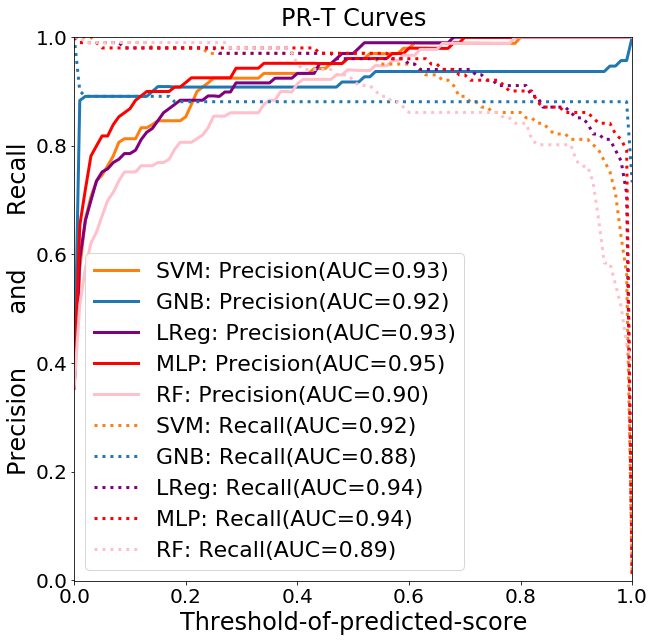

Plot saved in  prt.png


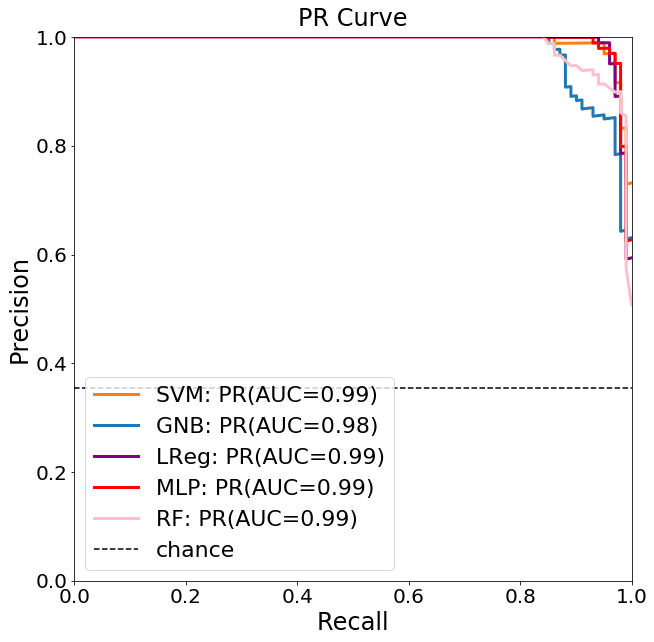

Plot saved in  pr.png


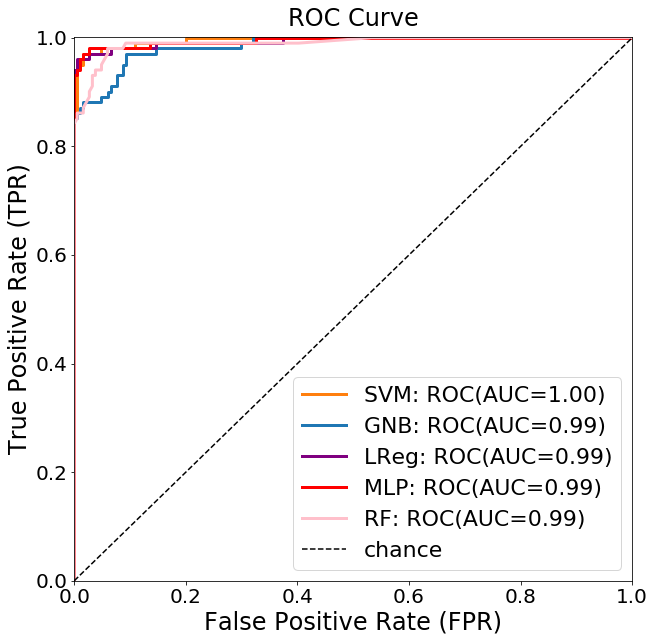

Plot saved in  roc.png


In [5]:
#from classicalML_train_test_evaluate import *
#from dataloader import *

prt_info_dic = {}
pr_info_dic = {}
roc_info_dic = {}

'''Data'''
X_train, X_test, y_train, y_test = prepare_wisconsin_dataset(scaling=True)
coi = 0
prt_bins = 101
threshold = 0.5
#threshold = ((y_train == coi).sum())/len(y_train)
print("Threshold = ", threshold)
color = {
    'svm': 'tab:orange',
    'gnb': 'tab:blue',
    'lreg': 'purple',
    'mlp': 'red',
    'rf': 'pink'
}

'''Model train-test with SVM'''
y_gt_thisCls, y_predProb_thisCls = model_test(modelSVM_train(X_train, y_train), X_test, y_test, coi)
get_confusion_matrix(y_gt_thisCls, y_predProb_thisCls, threshold)

'''Evaluate SVM'''
prt_info_dic["SVM"] = (model_evaluateWithPRT(y_gt_thisCls, y_predProb_thisCls, prt_bins), color['svm'])
pr_info_dic["SVM"] = ( model_evaluateWithPR(y_gt_thisCls, y_predProb_thisCls), color['svm'])
roc_info_dic["SVM"] = (model_evaluateWithROC(y_gt_thisCls, y_predProb_thisCls), color['svm'])


'''Model train-test with Gaussian Naive Bayes (GNB)'''
y_gt_thisCls, y_predProb_thisCls = model_test(modelGNB_train(X_train, y_train), X_test, y_test, coi)
get_confusion_matrix(y_gt_thisCls, y_predProb_thisCls, threshold)

'''Evaluate GNB'''
prt_info_dic["GNB"] = (model_evaluateWithPRT(y_gt_thisCls, y_predProb_thisCls, prt_bins), color['gnb'])
pr_info_dic["GNB"] = (model_evaluateWithPR(y_gt_thisCls, y_predProb_thisCls), color['gnb'])
roc_info_dic["GNB"] = (model_evaluateWithROC(y_gt_thisCls, y_predProb_thisCls), color['gnb'])


'''Model train-test with Logistic Regression (LReg)'''
y_gt_thisCls, y_predProb_thisCls = model_test(modelLR_train(X_train, y_train), X_test, y_test, coi)
get_confusion_matrix(y_gt_thisCls, y_predProb_thisCls, threshold)

'''Evaluate LReg'''
prt_info_dic["LReg"] = (model_evaluateWithPRT(y_gt_thisCls, y_predProb_thisCls, prt_bins), color['lreg'])
pr_info_dic["LReg"] = (model_evaluateWithPR(y_gt_thisCls, y_predProb_thisCls), color['lreg'])
roc_info_dic["LReg"] = (model_evaluateWithROC(y_gt_thisCls, y_predProb_thisCls), color['lreg'])


'''Model train-test with Multilayer Perceptron (MLP)'''
y_gt_thisCls, y_predProb_thisCls = model_test(modelMLP_train(X_train, y_train), X_test, y_test, coi)
get_confusion_matrix(y_gt_thisCls, y_predProb_thisCls, threshold)

'''Evaluate MLP'''
prt_info_dic["MLP"] = (model_evaluateWithPRT(y_gt_thisCls, y_predProb_thisCls, prt_bins), color['mlp'])
pr_info_dic["MLP"] = (model_evaluateWithPR(y_gt_thisCls, y_predProb_thisCls), color['mlp'])
roc_info_dic["MLP"] = (model_evaluateWithROC(y_gt_thisCls, y_predProb_thisCls), color['mlp'])


'''Model train-test with Random Forest (RF)'''
y_gt_thisCls, y_predProb_thisCls = model_test(modelRF_train(X_train, y_train), X_test, y_test, coi)
get_confusion_matrix(y_gt_thisCls, y_predProb_thisCls, threshold)

'''Evaluate RF'''
prt_info_dic["RF"] = (model_evaluateWithPRT(y_gt_thisCls, y_predProb_thisCls, prt_bins), color['rf'])
pr_info_dic["RF"] = (model_evaluateWithPR(y_gt_thisCls, y_predProb_thisCls), color['rf'])
roc_info_dic["RF"] = (model_evaluateWithROC(y_gt_thisCls, y_predProb_thisCls), color['rf'])



'''Draw curve'''
draw_PRT_forMultiModels(prt_info_dic)#, figFile="prt2.png")
draw_PR_forMultiModels(pr_info_dic)#, figFile="pr2.png")
draw_ROC_forMultiModels(roc_info_dic)#, figFile="roc2.png")